In [51]:
# Setup imports
from __future__ import division, print_function
import sys, os, warnings
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')  # Enable importing from package ddl without installing ddl

# Setup plotting functions
%matplotlib inline 
PLOT_HEIGHT = 3
def get_ax(ax, title):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(PLOT_HEIGHT, PLOT_HEIGHT))
        fig.tight_layout()
    if title is not None:
        ax.set_title(title)
    ax.axis('equal')
    ax.set_adjustable('box')
    return ax
def plot_data(X, y, ax=None, title=None):
    ax = get_ax(ax, title)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=4)
def plot_density(density, bounds=[[0, 1], [0, 1]], n_grid=40, ax=None, title=None):
    ax = get_ax(ax, title)
    x = np.linspace(*bounds[0], n_grid)
    y = np.linspace(*bounds[1], n_grid)
    X_grid, Y_grid = np.meshgrid(x, y)
    logpdf = density.score_samples(np.array([X_grid.ravel(), Y_grid.ravel()]).T)
    pdf_grid = np.exp(logpdf).reshape(X_grid.shape)
    ax.pcolormesh(X_grid, Y_grid, -pdf_grid, cmap='gray', zorder=-1)
def plot_multiple(X_arr, y_arr, titles=None):
    if titles is None:
        titles = [None] * len(X_arr)
    n_cols = int(min(4, len(X_arr)))
    n_rows = int(np.ceil(len(X_arr) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(PLOT_HEIGHT * n_cols, PLOT_HEIGHT * n_rows))
    axes = axes.ravel()
    fig.tight_layout()
    for i, (X, y, ax, title) in enumerate(zip(X_arr, y_arr, axes, titles)):
        if hasattr(X, 'score_samples'):
            # Special case of plotting a density instead
            if 'get_prev_bounds' in y:
                if y.pop('get_prev_bounds'):
                    y['bounds'] = [axes[i - 1].get_xlim(), axes[i - 1].get_ylim()]
            plot_density(X, ax=ax, title=title, **y)
        else:
            plot_data(X, y, ax=ax, title=title)
def plot_before_and_after(X, Z, y, destructor, label='destructor'):
    if hasattr(destructor, 'fitted_destructors_'):
        print('Number of layers including initial destructor = %d'
              % len(destructor.fitted_destructors_))
    if hasattr(destructor, 'cv_test_scores_'):
        print('Mean cross-validated test likelihood of selected model: %g' 
              % np.mean(destructor.cv_test_scores_[destructor.best_n_layers_ - 1]))
    get_prev_bounds = ()
    plot_multiple([X, destructor.density_, Z],
                  [y, dict(get_prev_bounds=np.min(X) < 0 or np.max(X) > 1), y], 
                  titles=['Before %s' % label, 'Implicit density', 'After %s' % label])

In [81]:
N = 1000
mu = [[0.0, 0.0], [-3.5, 1.5], [2.0, 5.0]]
var = [[[1, 0], [0, 1]], [[1.2, 0.5], [0.5, 1.5]], [[3.3, 0.9], [0.9, 3.3]]]
I = np.random.choice([0, 1, 2], p=[0.25, 0.45, 0.30], size=N)

In [82]:
x = list()
w = list()
y = list()
z = list()
for i in range(N):
    x.append(np.random.multivariate_normal(mu[I[i]], var[I[i]]))
    if I[i]==0:
        y.append(x[i])
    elif I[i]==1:
        z.append(x[i])
    else:
        w.append(x[i])
x = np.array(x)
w = np.array(w)
y = np.array(y)
z = np.array(z)

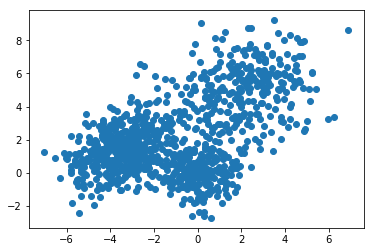

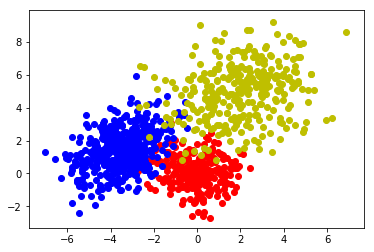

In [83]:
plt.scatter(x[:,0], x[:,1])
plt.show()
plt.scatter(y[:,0], y[:,1], color='r')
plt.scatter(z[:,0], z[:,1], color='b')
plt.scatter(w[:,0], w[:,1], color='y')
plt.show()

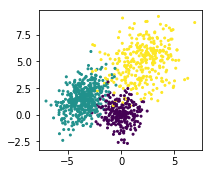

In [84]:
plot_data(x, I)

In [85]:
# Independent destructor
from ddl.independent import IndependentDensity, IndependentDestructor
from ddl.univariate import ScipyUnivariateDensity
import scipy.stats

# Create independent Gaussian/normal density
ind_density = IndependentDensity(
    univariate_estimators=ScipyUnivariateDensity(scipy_rv=scipy.stats.norm)
)
# Create corresponding destructor using the explicit density created above
ind_destructor = IndependentDestructor(ind_density)
Z_ind = ind_destructor.fit_transform(X)

plot_before_and_after(X, Z_ind, y, ind_destructor)

ImportError: No module named 'ddl'